**ASSIGNMENT 1 - EMPIRICAL STUDY OF KNAPSACK PROBLEM**

**Knapsack Problem**

The 0/1 Knapsack Problem is a classic optimization challenge where you're provided with a set of items, each with a weight and a value, and tasked with selecting the most valuable combination of items to fit into a knapsack with a limited weight capacity, making binary decisions (0 for exclusion, 1 for inclusion) for each item. The objective is to maximize the total value of the chosen items while ensuring that their cumulative weight doesn't exceed the knapsack's capacity. In this assignment we look at different algorithms in producing an optimal solution to the 0/1 Knapsack Problem.

**Dataset**

The dataset used for this assignment sourced from: https://www.kaggle.com/datasets/warcoder/knapsack-problem?resource=download

The dataset consists of 9999 unique 0/1 Knapsack Problem instances, with 5 attribute columns.
Attribute columns include:
1. Weights - list of item weights
2. Prices - coressponding list of item values/prices
3. Capacity - max weight capcity of bag
4. Best picks - optimal selection of items, represented in 0s and 1s
5. Best price - the corresponding optimal value of optimal selected items

**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np

**Read Dataset**

In [ ]:
url = 'https://raw.githubusercontent.com/mailynmailyn/CSI4106-Assignment1/main/knapsack_5_items.csv'

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset? :

In [ ]:
dataset.columns

Index(['Weights', 'Prices', 'Capacity', 'Best picks', 'Best price'], dtype='object')

As we expected, we have columns for weights, costs, capacity, best picks and best price for all the instances.

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(10)

,Weights,Prices,Capacity,Best picks,Best price
0,[46 40 42 38 10],[12 19 19 15 8],40,[0. 1. 0. 0. 0.],19.0
1,[11 31 4 6 7],[ 2 8 18 16 3],64,[1. 1. 1. 1. 1.],47.0
2,[32 49 27 37 24],[19 16 16 4 1],87,[1. 0. 1. 0. 1.],36.0
3,[20 35 22 23 16],[19 17 19 9 1],21,[1. 0. 0. 0. 0.],19.0
4,[ 7 12 19 13 20],[10 11 18 15 5],50,[0. 1. 1. 1. 0.],44.0
5,[27 10 25 25 7],[13 19 7 16 3],66,[1. 1. 0. 1. 0.],48.0
6,[21 2 33 45 26],[ 1 14 10 6 13],80,[0. 1. 1. 0. 1.],37.0
7,[37 27 39 14 25],[18 7 15 4 13],35,[0. 0. 0. 0. 1.],13.0
8,[ 1 48 4 23 39],[ 9 4 10 16 12],51,[1. 0. 1. 1. 0.],35.0
9,[ 4 3 22 9 32],[14 6 3 17 8],53,[1. 1. 0. 1. 1.],45.0


**Preprocessing Step**


In [ ]:
def string_to_list(string):

  string_list = string.strip('[]').split()

  float_list = [float(element) for element in string_list]

  return float_list

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
dataset['Best picks'] = dataset['Best picks'].apply(lambda x : string_to_list(x))

<ipython-input-30-833fb421dc49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Weights = dataset.Weights.apply(lambda x : string_to_list(x))
<ipython-input-30-833fb421dc49>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Prices = dataset.Prices.apply(lambda x : string_to_list(x))
<ipython-input-30-833fb421dc49>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

**4. Generate and Test**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:

# function to calculate valid knapsack item combinations
def combinations_mod(weights, capacity):
    # generate all permutations of 0s and 1s in 5 spaces
    b_combos = itertools.product([0,1], repeat=5)
    combinations = []

    # if weight of combo exceeds capacity, remove from combination list
    for combo in b_combos:
        sum = 0
        for index, item in enumerate(combo):
            if(item == 1):
                sum += weights[index]
        if sum <= capacity:
            combinations += [combo]
    return combinations


In [ ]:
def gen_and_test(data):

  best_solution_price = 0
  # find all possible knapsack item combinations that are less that capacity
  valid_combos = combinations_mod(data["Weights"], data["Capacity"])

  for combo in valid_combos:
    price = 0

    # calculate price of combination, if greater than current best price, replace price and best solution
    for index, num in enumerate(data["Prices"]):
      if combo[index] == 1:
        price += num

    if price > best_solution_price:
      best_solution_price = price
      best_solution = combo

  return best_solution_price, best_solution



In [ ]:
solutions = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = gen_and_test(row)
    solutions.append(1 if target == solution else 0)


In [ ]:
# Accuracy
print('Accuracy of best prices found is', np.mean(solutions))

Accuracy of best prices found is 1.0


**Your Analysis:**

In programming this solution, we were able to generate an accuracy of 1, as we explore every possible knapsack instace which allows us to find the optimal solution each time. This indicates that the solution on Kaggle is trustable. Initially, there was a point at which we recieved an accuracy less than 1, however that was the result of only looking at all weight combinations (as opposed to all vector combinations), which did not take into account duplicated weights.

------------------------------------------------------------------------------------------------

**5. Greedy Search**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
def greedy(data):
  weights = data["Weights"]
  values= data["Prices"]
  ratios = list(zip(values, weights))

  # create list of tuple including the value/weight ratio and it's original index value
  for index, ratio in enumerate(ratios):
    ratios[index] = (index, (ratio[0]/ratio[1]))

  # sort ratios from greatest to least
  sorted_ratios = sorted(ratios, key=lambda x: x[1], reverse=True)

  held = 0
  capacity = data["Capacity"]
  price = 0
  # start with an empty bag
  best_solution = [0, 0, 0, 0, 0]

  # loop through ordered ratios, add item to bag if it does not exceed weight capacity
  # if item is added to knapsack, increase weight and price respectively, and update the best knapsack solution instance
  for ratio in sorted_ratios:

    if (held + weights[ratio[0]]) <= capacity:
      held += weights[ratio[0]]
      price += values[ratio[0]]
      best_solution[ratio[0]] = 1

  best_solution_price = price

  return best_solution_price, best_solution


In [ ]:
solutions_greedy = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = greedy(row)
    solutions_greedy.append(1 if target == solution else 0)


In [ ]:
print("Greedy Accuracy is", np.mean(solutions_greedy))

Greedy Accuracy is 0.8341937443061038


**Your Analysis:**

The greedy algorithm provides a quite high accuracy in finding the optimal knapsack instance.

Our approach involved choosing the highest value/weight ratio item available, that would not exceed weight capacity.
The high accuracy may be due to the amount of possible items being smaller. We assume that with a greater options, the greedy algorithm would become less accurate as there is a greater chance of reaching a local maxima. Also, in discussing with our peers, the greedy algorithm considering only values instead of ratios seems to have a higher accuracy.

------------------------------------------------------------------------------------------------

**6. Simulated Annealing**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.


In [ ]:
import random
import math

def accept(delta_e, temperature):
    # if value/energy of new solution is an increase, accept solution
    if delta_e > 0:
        return True
    else:
        # deciding on acceptance of worse solution
        r = random.random()
        if (r < math.exp(delta_e/temperature)):
           return True
        else:
           return False

def simulated_annealing(data, N, initial_temperature, cooling_rate):

  temperature = initial_temperature

  weight = data["Weights"]
  value = data["Prices"]
  capacity = data["Capacity"]
  energy = 0

  # # empty bag
  # sol = [0,0,0,0,0]

  # # greedy bag
  # sol = greedy(data)[1]

  # random bag
  b_combos = list(itertools.product([0,1], repeat=5))
  sol = list(random.choice(b_combos))

  # calculate weight of random bag instance
  weight_total = sum([a * b for a, b in zip(sol, weight)])

  # if initial random bag has a weight greater than capacity, regenerate random bag
  while weight_total > capacity:
    sol = random.choice(b_combos)
    weight_total = sum([a * b for a, b in zip(sol, weight)])

  # calculate energy, aka price
  energy = sum([a * b for a, b in zip(sol, value)])

  for i in range(N): #iterate 10 times
    #flip random item in bag
    flip_index = random.randint(0, 4)
    new_sol = list(sol)

    if new_sol[flip_index] == 1:
      new_sol[flip_index] = 0
    else:
      new_sol[flip_index] = 1

    # calculate energy and weight of newly flipped bag
    new_energy = 0
    new_weight = 0
    new_energy = sum([a * b for a, b in zip(new_sol, value)])
    new_weight = sum([a * b for a, b in zip(new_sol, weight)])

    # calculate difference between energy of initial bag and newly flipped bag
    delta_e = new_energy - energy

    # pass new bag to acceptance function
    if accept(delta_e, temperature):
      # if new bag is accepted and is within weight capacity and has a greater energy than current best solution,  change to optimal solution
      if (new_weight <= capacity) and (new_energy >= energy):
        sol = new_sol
        energy = new_energy

    # cool the temperature
    temperature = cooling_rate * temperature

  best_solution = sol
  best_solution_price = energy

  return best_solution_price, best_solution


In [ ]:
solutions_sa = []
for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = simulated_annealing(row, N = 10, initial_temperature=1, cooling_rate=0.95)
    solutions_sa.append(1 if target == solution else 0)


In [ ]:
print("Simulated Annealing Accuracy is", np.mean(solutions_sa))

Simulated Annealing Accuracy is 0.39771231906063365


**Your Analysis:**

In exploring multiple other values for cooling rate, there seems to be little to no effect on the final accuracy, same with the initial temperature. Increasing N to 60 iterations improves the accuracy by about 5%, however it stagnates at 45% after this.   

Main observations in the accuracy of simulated annealing regarded the starting dataset. The current solution begins with a randomly generated bag. With only the random bag and simulated annealing, the resulting accuracy is around 18%. However, with the addition of an initial check that the starting random bag has a weight within capacity, the accuracy jumps to around 40%.

Starting with an empty bag (zero vector) the accuracy is about 35%. Starting with greedy algorithm results shoots accuracy to around 83%, but that is most likely heavily reliant on the greedy algorithm. The percentage doesn't really change over a few trials, so the greedy algorithm is more correct and has less positive impact from annealing.

This analysis indicates that either the simulating annealing algorithm is quite inneffective, or there is a bug.

------------------------------------------------------------------------------------------------

**7. Genetic Algorithm**

Give a description... Also, make sure that you put comments using your own words in the code to show that you understand the code that you are submitting.

In [ ]:
import random

def calculate_fitness(bag, prices, weights, capacity):

  # calculate price (fitness) and total weight of bag
  fitness = sum([a * b for a, b in zip(bag, prices)])
  weight = sum([a * b for a, b in zip(bag, weights)])

  # if the weight is greater than capacity, fitness is zero
  if weight > capacity:
    return 0


  return fitness

def crossover(parent1, parent2, cross_rate):

  parent1 = list(parent1)
  parent2 = list(parent2)

  # based on crossover rate of acceptance
  if random.random() > cross_rate:
    # calculate random crossover point within parent item list
    crossover_point = random.randint(1, len(parent1) - 1)

    # # calculate middle crossover point
    # crossover_point = len(parent1)//2

    # create two children based on crossover halves
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]

  else:
    return parent1, parent2


  return child1, child2

def mutation(child, mut_rate):

  # based on mut_rate of acceptance
  if random.random() > mut_rate:
    # flip random item in bag
    flip_index = random.randint(0, 4)
    new_child = list(child)

    if child[flip_index] == 1:
      new_child[flip_index] = 0
    else:
      new_child[flip_index] = 1
  else:
    return child


  return new_child

def genetic_algorithm(data, population_size, num_generations, mut_rate, cross_rate, tournament_size):

  prices = data["Prices"]
  weights = data["Weights"]
  capacity = data["Capacity"]

  # create initial population
  # random bag
  b_combos = list(itertools.product([0,1], repeat=5))
  pop = []

  # generate population of random bags
  for i in range(population_size):

    bag = random.choice(b_combos)
    pop.append(random.choice(b_combos))

  # for specified number of generations
  for _ in range(num_generations):

    # calc fitness score of each bag
    for index, bag in enumerate(pop):
      fitness = calculate_fitness(bag, prices, weights, capacity)
      pop[index] = (bag, fitness)

    # half of pop size sets of parents
    parents = []
    for _ in range(population_size // 2):

      tournament_select = []
      # create tournament of tournament size and two highest fitness score bags
      for _ in range(tournament_size):
        tournament_select.append(random.choice(pop))

      # sort bags in tournaments in descending order by fitness score
      tournament_select = sorted(tournament_select, key=lambda x: x[1], reverse = True)
      parents.append((tournament_select[0][0], tournament_select[1][0]))


    new_pop = []
    # generate children from parents
    for pair in parents:

      # cross and mutate parents
      child1, child2 = crossover(pair[0], pair[1], cross_rate)
      child1 = mutation(child1, mut_rate)
      child2 = mutation(child2, mut_rate)

      # append children to next gen population
      new_pop.append(child1)
      new_pop.append(child2)

    pop = new_pop


  best_solution_price = 0
  best_solution = []
  # calc fitness score of each bag in final generation, save fitness score (overweight instances have fitness of 0)
  for index, bag in enumerate(pop):
    fitness = calculate_fitness(bag, prices, weights, capacity)

    if fitness > best_solution_price:
      best_solution_price = fitness
      best_solution = bag



  return best_solution_price, best_solution

In [ ]:
# TAKES 2 MINUTES AND 14 SECONDS TO RUN

solutions_ga = []

for _, row in dataset.iterrows():
    target = row['Best price']
    solution, indexes = genetic_algorithm(row, population_size = 50, num_generations = 50, mut_rate = 0.5, cross_rate = 0.5, tournament_size = 5)
    solutions_ga.append(1 if target == solution else 0)


In [ ]:
print("Genetic Algorithm Accuracy is", np.mean(solutions_ga))

Genetic Algorithm Accuracy is 0.9813746330600264


**Your Analysis:**

Using the Genetic Algorithm yields high accuracy for the knapsack problem with the default values of 0.1 mutation and 0.7 crossover (96%). In swapping the values of the rates, the accuracy ends the same (96%).

We observed the individual adjustment of rates, limiting the genetic algorithm to only mutation or crossover, and found that with constant crossover, the algorithm is much more accurate than constant mutation. However, both mutation and crossover seem to peak in accuracy when set to a mid acceptance point of 0.5, and mutation peaks at a 99% accuracy, vs. 92% for crossover.

Crossover is more consistently helpful to the algorithm, however mutation under a filter is even more beneficial.


------------------------------------------------------------------------------------------------

**8. Comparative Study**

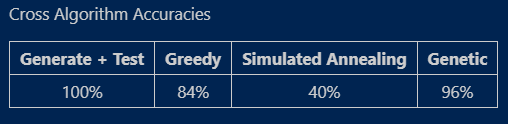


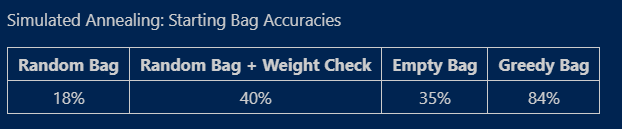

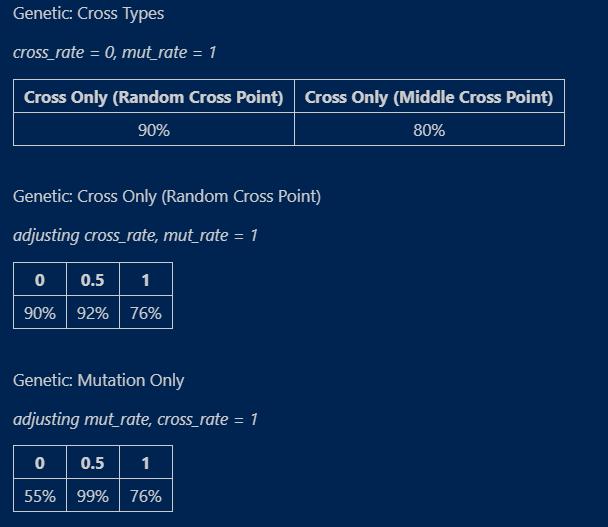

--------------------------------------------------------------------------


**9. Conclusion**

Overall, through this assignment, we have learned that there are many parameters that affect the effectiveness of an algorithm. It seems to be an overall effort to most efficiently review the most possibilities. Generate and test is not possible for larger datasets, so we see algorithms such as Genetic that maintain a guided randomness to find the best solution in a reasonable amount of time. Our genetic implementation took longer than Generate + Test, however with the addition of more items, Generate + Test becomes exponentially greater in runtime.

In Simulated Annealing, it was interesting to observe the impact of a starting dataset on accuracy. Starting from nothing proved to be more accurate than a randomly selected bag, as maybe the probability of generating an overweight bag is far more probably than generating a close to optimal solution. It was also demonstrated that screening the initial random bag to be within weight capacity greatly improved accuracy.

Finally in the Genetic algorithm, the changing of acceptance rates showed consistency in the crossover strategy, and great effectiveness in mutating children 50% of the time. It would be good to observe a more fine causal relationship between the two, as setting both rates to 0.5 yields 98% accuracy, less than only mutation at 0.5.

--------------------------------------------------------------------------


**10 References**

Greedy Algorithm:
- referenced general class slides and previous knowledge

Simulated Annealing:
- referenced slides 22, 24 and 25 of CSI4106 Population Based slide deck

Genetic Algorithm:
- referenced this solution methodology: https://arpitbhayani.me/blogs/genetic-knapsack/
- referenced slides 42 amd 43 of CSI4106 Population Based slide deck
